In [1]:
#Nathan Li - Letters ABC - 5/14/2021

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lettersabc/LettersABC.csv


In [2]:
hand_data = pd.read_csv("/kaggle/input/lettersabc/LettersABC.csv")
hand_data.head()
hand_data.drop(59, inplace=True)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split

Epoch 1/20
7/7 [==============================] - 1s 95ms/step - loss: 1.9998e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_categorical_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 0s 21ms/step - loss: 1.8682e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_categorical_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 21ms/step - loss: 1.8454e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_categorical_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 20ms/step - loss: 1.9387e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_categorical_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 1.9646e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_categorical_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 1.8637e-07 - categorical_accuracy: 1.0000 - val_loss: 2.5946e-07 - val_cat

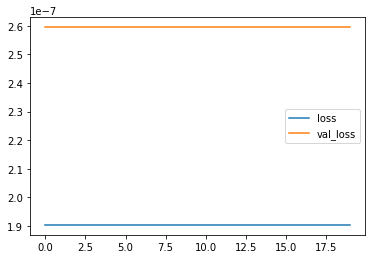

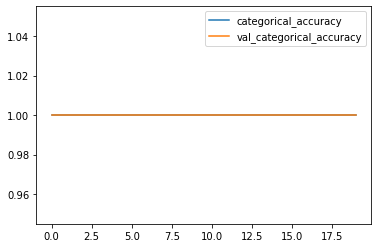

In [4]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[133]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

y = hand_data["Letter"]
X = hand_data.drop("Letter", axis = 1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=10,
    epochs=20,
)

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df[['loss', 'val_loss']].plot();
history_df[['categorical_accuracy', 'val_categorical_accuracy']].plot();

It's important to note that this used categorical loss and accuracy metrics instead of MAE because identifying letters ABC relates to classification, not regression.